# Probabilities and distributions
This jupyter notebook introduces the usage and interpretation of statistical descriptors as well as basic concept in using probabilities and probability distributions.


## Installation of libraries and necessary software


This notebook requires an R kernel to run the R scripts. We recommend to install the latest R version (https://www.r-project.org/), open an R console and then follow the instructions in https://irkernel.github.io/installation.

More features and a user-friendly environment to run R scripts outside jupyter are available through __[RStudio](https://www.rstudio.com/products/rstudio/download/)__

Install the necessary libraries (only needed once) by executing (shift-enter) the following cell:




In [1]:
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("perm", repos='http://cran.us.r-project.org')
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("qvalue")


Installing package into 'C:/Users/arvid/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\arvid\AppData\Local\Temp\RtmpcNrZrq\downloaded_packages


Installing package into 'C:/Users/arvid/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'perm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\arvid\AppData\Local\Temp\RtmpcNrZrq\downloaded_packages


Bioconductor version 3.8 (BiocManager 1.30.4), R 3.5.1 (2018-07-02)
Installing package(s) 'qvalue'


package 'qvalue' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\arvid\AppData\Local\Temp\RtmpcNrZrq\downloaded_packages


installation path not writeable, unable to update packages: boot, class,
  cluster, codetools, foreign, lattice, MASS, Matrix, mgcv, nlme, rpart,
  survival
Update old packages: 'recipes'


## Loading data and libraries
This requires that the installation above have been finished without error


In [2]:

library("MASS")
library("perm")
library("qvalue")

Warning message:
"package 'MASS' was built under R version 3.5.3"Warning message:
"package 'perm' was built under R version 3.5.3"Warning message:
"package 'qvalue' was built under R version 3.5.2"

The following commands provide important statistical descriptors of data sets:

__Examples:__  
`mean(x)` Returns average/mean of a data set  
`median(x)` Returns median of a data set  
`min(x)` Returns minimum of a data set  
`max(x)` Returns maximum of a data set  
`var(x)` Returns variance of a data set  
`sd(x)` Returns standard deviation of a data set  

#### Example for some random data _x_:

In [3]:
# 100 random values taken from a normal distribution with mean 0 and standard deviation 1 
# (default of rnorm function)
x <- rnorm(100)
paste("First 6 values:")
head(x)
paste("mean(x) =",mean(x))
# add your code here ...


[1] "First 6 values:"

[1]  1.0986437 -1.1981877 -0.2792119 -0.8884438  0.2652424  1.2143603

[1] "mean(x) = -0.07366186902275"

### Exercise 1
Create a data set containing the numbers 1 to 100 (`dset <- 1:100`) and calculate _mean, median, minium, maximum, variance_ and _standard deviation_. 




#### Add your answers here
(double-click here to edit the cell)

##### Question: <u>Why are _mean_ and _median_ the same?</u>



##### Question: <u>What is the relationship between _variance_ and _standard deviation_?</u>





### Exercise 2
Calculate `sum(dset)/length(dset)` and compare the returned value to the ones from the previous exercise. 




#### Add your answer here
(double-click here to open the cell)



### Exercise 3
Try to understand what happens in the script below.

Vary the number of random values (e.g. from 5000 to 1000, 100 and 10000). 


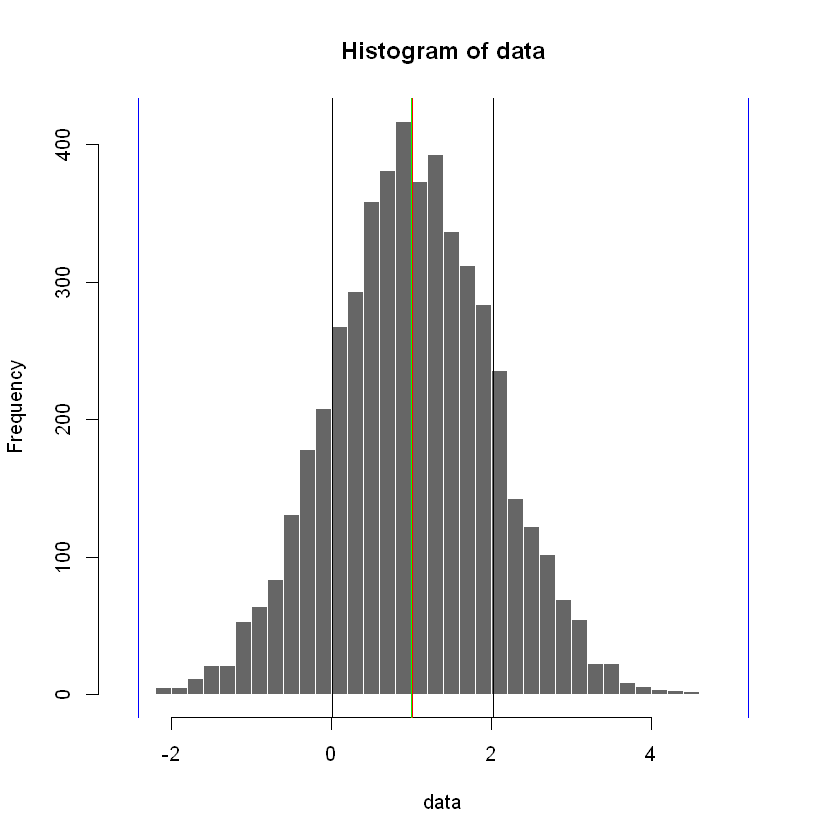

In [4]:
# 5000 random variables from a normal distribution with mean 1 and standard deviation 1
data <- rnorm(5000,1,1)
# standard histogram
hist(data, 50, col="#666666", border="white")
# adding statistical descriptors
dmean <- mean(data)
abline(v=dmean,col="red")
dmedian <- median(data)
abline(v=dmedian,col="green")
dmin <- min(data)
abline(v=dmin,col="blue")
dmax <- max(data)
abline(v=dmax,col="blue")
dsd <- sd(data)
abline(v=dmean+dsd)
abline(v=dmean-dsd)

#### Add your answer here
(double-click here to edit the cell)

#### Question: <u>Are minimum and maximum good descriptors of this data set?</u>




### Exercise 4
Apply the same analysis on `data <- rlnorm(5000)`



In [5]:
# Add our code here ...

#### Add your answer here
(double-click here to edit the cell)

#### Question: <u>What is different?</u>


#### Question: <u>Do the statistical descriptors provide useful information?</u>



### Exercise 5
Calculate the statistical descriptors for flow cytometry data of RNA molecules (from paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3575505/#s2). 

You can get the processed table from http://computproteomics.bmb.sdu.dk/BMB539Data/FlowCytoData.csv (use `read.csv()` on the web page and write it into the object `FlowCyt`).

The columns _X18s.RNA_, _abl_ and _bcr_ denote the different molecules. Rows correspond to quantifications in different cells. Apply the statistical descriptors on the values in the columns with the additional arguent `na.rm=T` (e.g. `mean(FlowCyt$bcr, na.rm=T)`). 





In [6]:
A <- read.csv(url("http://computproteomics.bmb.sdu.dk/BMB539Data/FlowCytoData.csv"))
# add your code here ...

Warning message in open.connection(file, "rt"):
"InternetOpenUrl failed: 'The server name or address could not be resolved'"

ERROR: Error in open.connection(file, "rt"): cannot open the connection


#### Add your answer here
(double-click here to edit the cell)

#### Question: <u>Do the statistical descriptors describe all molecules accurately?</u>


#### Question: <u>Would you trust a report that provides only mean and standard deviation when you compare them to the distributions?</u>



### Exercise 6
There are several functions to create data sets that contain random numbers: `rnorm, runif, rexp` (drawn from a normal, a uniform and an exponential distribution, respectively). Apply the functions to create 10, 20 and 50 random numbers.






In [7]:
# add your code here ...

#### Add your answer here
(double-click here to open the cell)

#### Question: <u>Do you see a basic pattern in the values for each of the distributions?</u>

#### Question: <u>What are specific properties of the distributions? You can check the help pages (e.g. by writing `?rnorm`)</u>


 ### Exercise 7
 Create 1000 random numbers that are uniformly distributed:
 
 The plot shows a histogram. Discuss the meaning of the different parts of the plot with your neighbors. Change the number of bins (_breaks_ in R). Estimate which number of bins describes the data best.  

<!-- Create a boxplot of the data (`boxplot(unif_dat)`) and understand what the figure shows. You can find a simple explanation of boxplots here:    
 http://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots -->



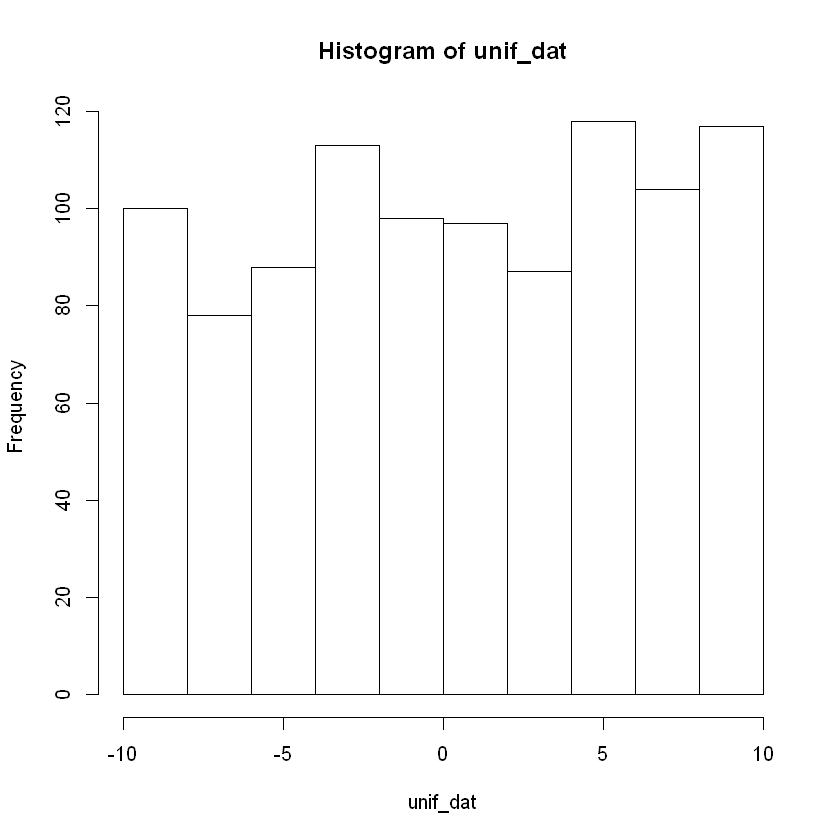

In [8]:
unif_dat <- runif(1000, -10,10) 
hist(unif_dat, breaks = 10) 
 

#### Add your answer here
(double-click here to open the cell)



<!-- ### Exercise 8 -->
<!-- Create an object _norm_dat_ containing 1000 normally distributed random numbers (`rnorm()` function). Visualize them by plotting the data as histogram and boxplot.  -->

<!-- What is different to the plots of uniformely distributed numbers? -->



### Exercise 7
Sort and plot the random numbers as _rank plot_:

You can compare two distributions by plotting their sorted values versus each other: `plot(sort(unif_dat), sorted_norm_dat)`. 

 
<!-- ## Estimate probabilities -->
<!-- TODO: -->
<!-- Exponential distribution, plot distributions  VERY DETAILED! -->
<!-- ```{r, echo=TRUE, eval=FALSE}x -->
<!-- data <- rexp(1000) -->
<!-- ``` -->
<!-- ## Visualization of large data amounts -->


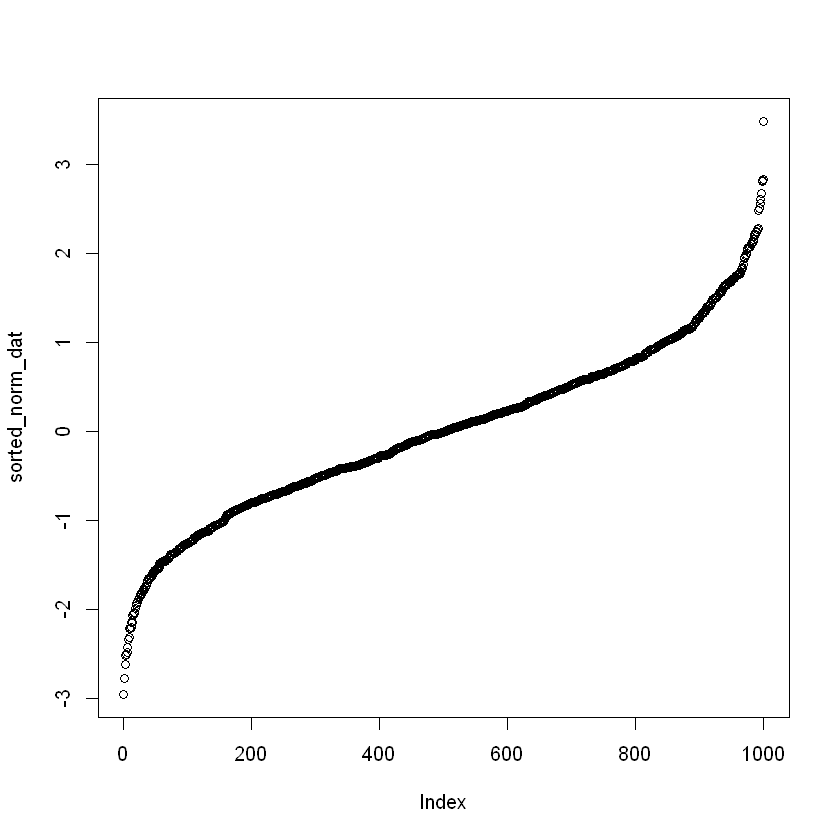

In [9]:
norm_dat <- rnorm(1000)
unif_dat <- runif(1000, -10,10) 
sorted_norm_dat <- sort(norm_dat)
sorted_unif_dat <- sort(unif_dat)
plot(sorted_norm_dat)
# add the other plot commands here ...


#### Add your answer here
(double-click here to open the cell)

#### Question: <u>Why are the ranked plot of the normal distribution and the plot for the comparison between the distributions similar?</u>



### Exercise 8

Download _Supplementary Dataset 1_ (first sheet _Cell extract (CE)_) from a study investigating bladder cancer cells T24 to detect changes between the cancer cells and their metastatic subtype. 
Link to paper: http://www.nature.com/articles/srep25619

Open the table with Excel/Libreoffice and save as csv-file. 

Import the table into R 

`prot_dat <- read.csv("TableName",row.names=1, skip=1)`
(you need to upload the file to your jupyter notebook folder)

If you get an error, try 

`prot_dat <- read.csv("TableName",row.names=1, sep=";", digits=",", skip=1)`

And if you still don't manage to read the csv-file, you can directly import the data from http://computproteomics.bmb.sdu.dk/BMB539Data/ProtTable.csv and apply 

`prot_dat <- read.csv("ProtTable.csv",row.names=1, skip=1)`

View the table and discuss its content: `View(prot_dat)`.

Convert the expression values to numerical values (ignore the warnings):  
`for (i in 13:22) prot_dat[,i] <- as.numeric(as.character(prot_dat[,i]))`

Plot the column `prot_dat$Area.T24_T1.normalized` as boxplot (`boxplot(...)`) and histogram (`hist(...)`). 

Plot all columns with intensities (access them by `prot_dat[,13:22]`) as boxplot.

Calculate _mean, median, sum_ and _standard deviation_ of one of the columns. Missing values will be dismissed by the argument _na.rm=T_, e.g. `mean(prot_dat[,13], na.rm=T)` 

Transform all protein abundances to their logarithm
`lprot_dat <- as.matrix(log2(prot_dat[,13:22]))
lprot_dat[!is.finite(lprot_dat)] <- NA
`
and make again boxplots and histogram: `boxplot(lprot_dat)`. 

Calculate _mean, median_ and _standard deviation_ of one of the columns and try to locate the values in the boxplot.




#### Add your answer here
(double-click here to open the cell)

#### Question: <u>What information does the file contain?</u>


#### Question: <u>What is strange when you plot the boxplot and the histogram of the data before taking its logarithm?</u>

#### Question: <u>Does the transformed data make more sense? Why could that be?</u>





### Exercise 9
_Probabilities_
- Read the description of ```dnorm()```: ```help(dnorm)```
- Plot the density (```dnorm()```) and the cumulative (```pnorm()```) probability distribution of a normal distribution with mean 2.5 and standard deviation 1.5.
- Read the probability of having a number between 0.5 and 4 from the cumulative distribution. Verify this number with its calculation ```pnorm(4, 2.5, 1.5) - pnorm(0.5, 2.5, 1.5)```
- Repeat the same for the intervals (-1, 2) and (1, 2)

_Frequencies_
- The relative number of observations per unit interval around $x=2$ (between 1.5 and 2.5) is given by ```dnorm(x=2, 2.5, 1.5)```. Hence
  - In a sample of 100 the expected number of observations per unit interval in the immediate vicinity of $x=2$ is 25.16
  - In a sample of 1000 the expected number of observations per unit interval in the immediate vicinity of $x=2$ is 251.6
  - The expected number of values from a sample of 1000, between 1.9 and 2.1, is approximately $0.2 \cdot 251.6 = 50.32$, or, more precisely,
```pnorm(2.1, 2.5, 1.5) - pnorm(1.9, 2.5, 1.5)```

- Repeat the calculation for the intervals (-1,2) and (1,2). 


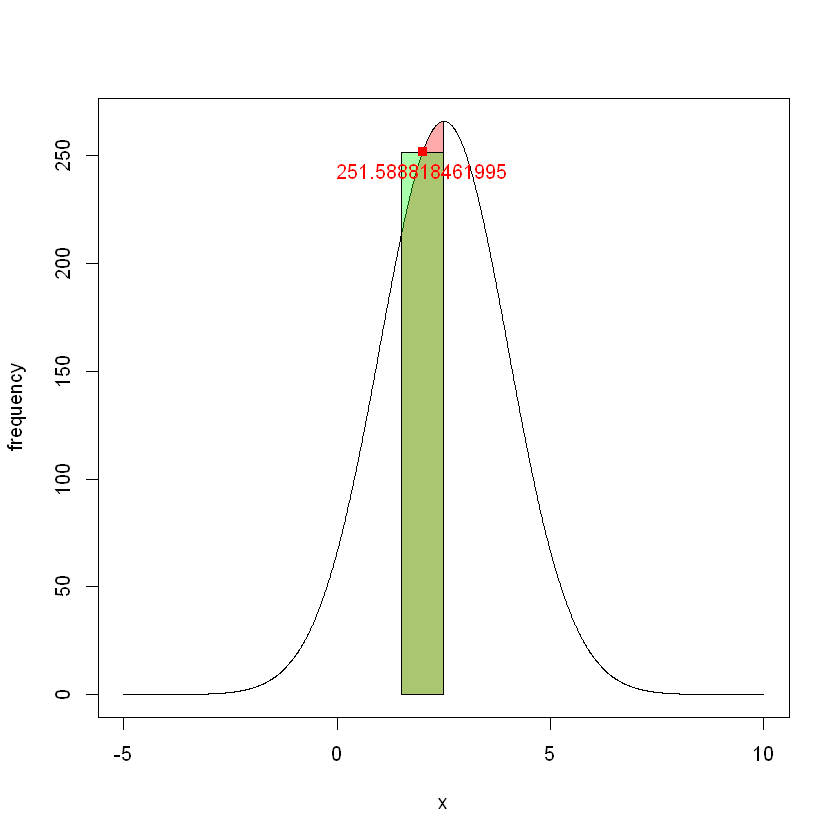

In [10]:
x <- seq(-5,10,0.01)
density <- dnorm(x, mean=2.5, sd=1.5)
cumulative <- pnorm(x, mean=2.5, sd=1.5)

## plot the functions:


# This code is related to a question below and the sample with 1000 observations above
plot(x, 1000*dnorm(x, mean=2.5, sd=1.5), type="l",ylab="frequency")
interval <- seq(1.5,2.5,0.01)
polygon(c(1.5,interval,2.5), c(0,1000*dnorm(interval, 2.5,1.5),0), col = "#FF000055")
polygon(c(1.5,2.5,2.5,1.5), 1000*c(dnorm(2, 2.5,1.5),dnorm(2, 2.5,1.5),0,0), col = "#00FF0055")
points(2,1000*dnorm(2,2.5,1.5),pch=15,col=2)
text(2,1000*dnorm(2,2.5,1.5),pch=15,col=2,labels =1000*dnorm(2,2.5,1.5), pos=1)


##### Question I:  <u>What are the 3 different arguments of these functions? How are they related to the Gaussian function?</u>

_Answer_

##### Question II:  <u>What is the difference between the first argument of ```dnorm``` and ```rnorm```?</u>

_Answer_

##### Question III:  <u>How would you estimate the probability of having a number between 0.5 and 4 from the density distribution?</u>

_Answer_

##### Question IV:  <u>What is the probability to obtain the number 2?</u>

_Answer_

##### Question V:  <u>What is the difference between probability and frequency?</u>

_Answer_

##### Question VI:  <u>How would you calculate the area of the rectangle and the area under the curve in the figure given above?</u>

_Answer_


### Exercise 10
We now check the behavior of the t-distribution which is an integral part of the t-test and exponential distribution.
- Plot the density and cumulative probability distribution (```dt()``` and ```pt``` with argument ```df=3```) for a t-distribution with 3 degrees of freedom. Plot the normal distribution over it with ```lines()```. 
- Plot the density and cumulative probability distribution for an exponential distribution (```dexp()```) with a rate parameter equal to 1 (the default). Repeat with a rate parameter equal to 2. What happens when you do the plot on logarithmic (y-coordinate) and double-logarithmic scale?


In [11]:
x <- seq(-5,5,0.01)
# density function
dens_t <- dt(x, df=3)

dens_exp <- dexp(x, rate = 1)
# continue ...


##### Question I:  <u>What happens with the t-distribution of high degrees of freedom?</u>

_Answer_

##### Question II:  <u>Which is a good visual way to check whether data is exponentially distributed?</u>

_Answer_


### Exercise 11
Use the function ```rnorm()``` to draw a random sample of 25 values from a normal distribution with a mean of 0 and a standard deviation equal to 1.0. Use a histogram, with ```probability=TRUE``` to display the values. Overlay the histogram with: (a) an estimated density curve; (b) the theoretical density curve for a normal distribution with mean 0 and standard deviation equal to 1.0. Repeat with samples of 100, 500 and 1000 values, showing the different displays in different panels on the same graphics page (```par(mfrow=...)```)


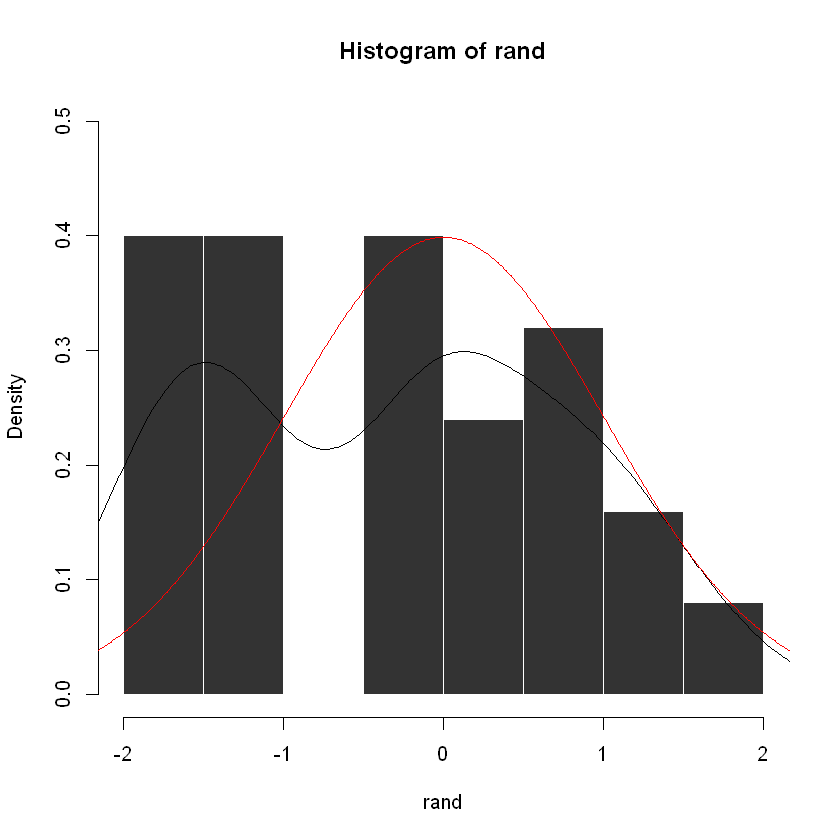

In [12]:
rand <- rnorm(25)
hist(rand, probability = TRUE,ylim=c(0,0.5), border="#FFFFFF", col="#333333")
lines(density(rand))
x <- seq(-5,5,0.01)
lines(x, dnorm(x), col=2)


##### Question I:  <u>What are the black and the red lines?</u>

_Answer_

##### Question II:  <u>What improves when you increase the number of values?</u>

_Answer_

##### Question III:  <u>What does ```#333333``` mean?</u>

_Answer_

### Exercise 12
Data with a distribution close to lognormal are common. Size measurements of biological organisms often have this character. As an example, consider the measurements of body weight (```body```) in the data frame ```Animals``` (```MASS``` package). Begin by drawing a histogram of the untransformed values, and overlay a density curve. Then

- Draw an estimated density curve for the logarithms of the values. 
- Determine the mean and standard deviation of ```log(Animals$body)```. Overlay the estimated density with the theoretical density for a normal distribution with the mean and standard deviation just obtained.



In [13]:
# Add you code here:

##### Question I:  <u>Does the distribution look like a normal distribution after transformation to a logarithmic scale??</u>

_Answer_

### Exercise 13
The following script plots an estimated density curve for a random sample of 50 values from a normal distribution:

- Plot estimated density curves (```plot(density(...))```) for random samples containing 50 values
  - the normal distribution
  - the uniform distribution (```runif(50)```)
  - the $t$-distribution with 3 degrees of freedom. 
-  Overlay the three plots and use different colors.
- Repeat the same but now taking random samples of 500 and 5000 values



In [14]:
# Add your code here:

##### Question I:  <u>Why is the estimated density curve of the uniformely distiubuted values much higher?</u>

_Answer_

### Exercise 13
There are two ways to make the estimated density smoother:

- One is to increase the number of samples
- The other one is to increase the bandwidth. For example
```
plot(density(rnorm(50), bw=0.2), type="l")
plot(density(rnorm(50), bw=0.6), type="l")
```

Repeat each of these with bandwidths of 0.15, with default choice of bandwidth, and with the bandwidth set to 0.75

In [15]:
# Add your code here:


### Exercise 14
The density estimation has the issue that it depends strongly on bandwidth and choice of kernel, making it sometimes not very useful to judge normality. A much better tool is the quantile-quantile plot, which uses an output similar to cumulative probability distributions. Try the following script and compare assess how the plot characterizes normally distributed data.
- See how the plot deviates when comparing the normal distribution with random variables from other distributions.
- Increase the number of data points
- Substitute the ```rnorm()``` function by random variables from other distributions (e.g. ```rexp()``` and ```rlnorm()```)


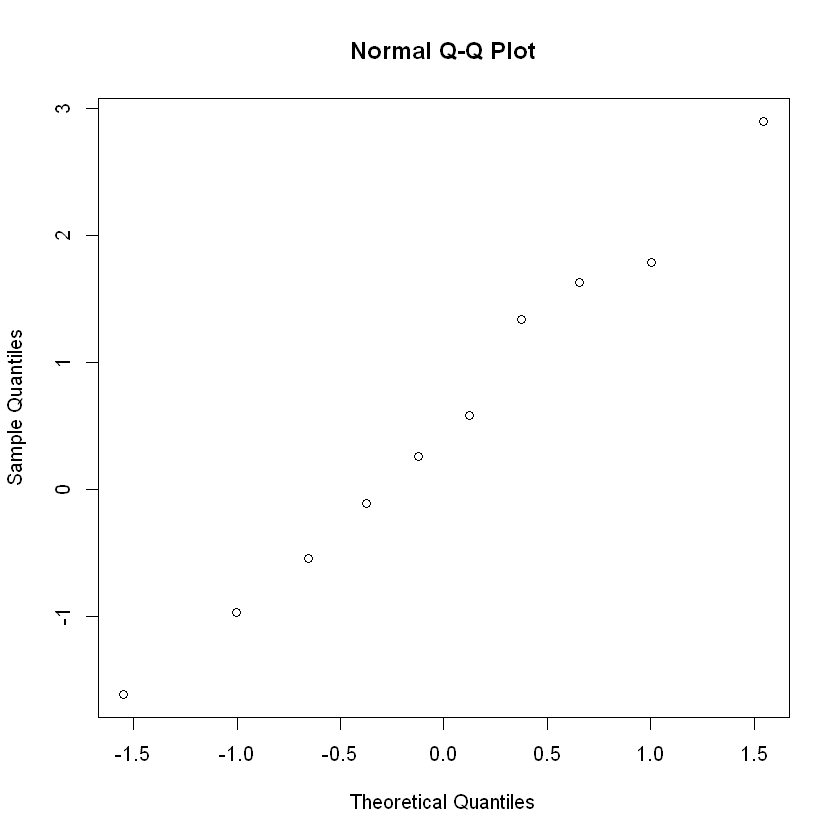

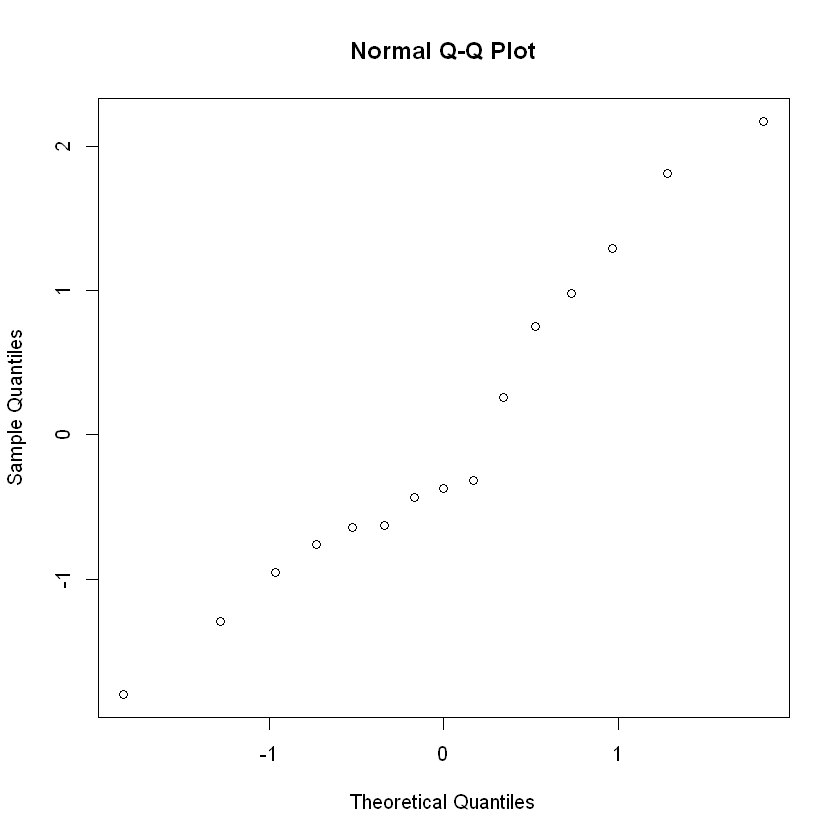

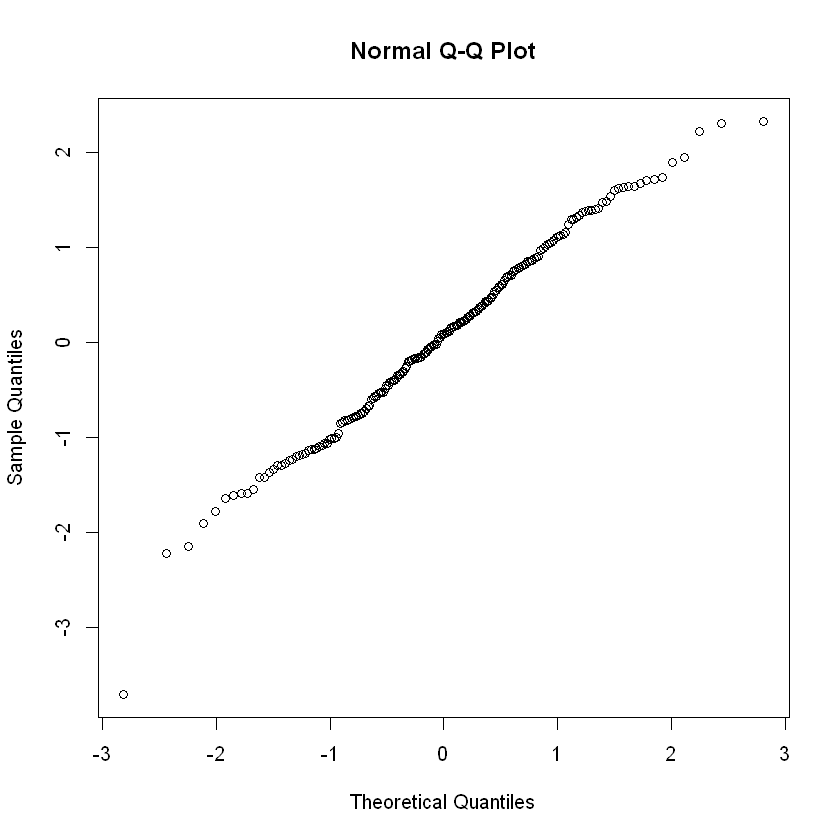

In [16]:
qqnorm(rnorm(10))
qqnorm(rnorm(15))
qqnorm(rnorm(200))


##### Question I:  <u>How does the ```qqnorm()``` function show that the data is normally distributed?</u>

_Answer_

##### Question II:  <u>Which is the limiting function when increasing the number of values to infinity?</u>

_Answer_

##### Question III:  <u>How do the other tested distributions show their difference to a normal distribution when using the ```qqnorm()``` function?</u>

_Answer_


### Exercise 15
Take the data sets ```lh``` and ```Animals``` and check for normality using ```qqnorm```. Do the same on their logarithmic values. Additionally, use ```boxplot()``` to get an idea about how the boxplot of a normal distribution looks.


In [17]:
library(MASS)
data("Animals")
# add your code here


##### Question I:  <u>Which data set is (approximately) normally distributed?</u>

_Answer_

##### Question II:  <u>Which data set is (approximately) log-normally distributed?</u>

_Answer_